
#####Libraries


In [1]:
import sklearn
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 17.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
# pip install TA-lib
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz

!tar -xzf ta-lib-0.4.0-src.tar.gz
%cd ta-lib/
!./configure --prefix=$HOME
!make
!make install

!TA_LIBRARY_PATH=~/lib TA_INCLUDE_PATH=~/include pip install ta-lib

--2022-10-20 10:41:37--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-10-20 10:41:37--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-10-20 10:41:37--  http://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving versaweb.dl.s

In [3]:
import talib as ta
import matplotlib.pyplot as plt

##### Load Dataset


In [4]:
#φτιάχνω τη λίστα με τα assets μου -> 50 μετοχές 
#διόρθωση : θα βγάλω τυχαία άλλες 4 μετοχές μαζί με την OGN επειδή δεν έχει το ίδιο μέγεθος με τις άλλες 
#βγάζω OGN ,WRK,HST,CE,ACN
assets= ["ABBV","AEP","AIZ","ALLE","AMAT","AMP","AMZN","AVB","AVY",   
  "AXP","BDX","BF-B","BMY","BR","CARR","CDW","CHTR","CNC",   
  "CNP","COP","CTAS","CZR","DG","DPZ","DRE","DXC","META","FTV",   
  "GOOG","GPC","HIG","JPM","KR","PG","PPL","PRU",   
  "PYPL","RE","ROL","ROST","UNH","URI","V","VRSK","XOM"]
#άρα πρέπει να κατεβάσουμε όλα τα adj close για όλες τις τιμές όλων των μετοχών και να κάνουμε απόλυτο ranking και σε 5 κλασεις (targets)
r=pd.DataFrame(index=pdr.get_data_yahoo(assets[0],'2021-01-01','2022-04-01')['Adj Close'].index)
#παίρνω τιμές για ένα χρόνο 
for i in assets:
  # print('i metoxi me onoma:',i,'exei megethos',pdr.get_data_yahoo(i,'2021-01-01','2022-04-01')['Adj Close'].count())
  temp= pdr.get_data_yahoo(i,'2021-01-01','2022-04-01')['Adj Close']
  temp=temp.dropna()
  r[i]=temp.values
#φτιάχνω ένα αντίγραφο με τις τιμές για να το έχω 
rd=pd.DataFrame(r)
rd1= rd.pct_change().shift(-1)
rd1

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04 00:00:00-05:00,0.010340,-0.001349,0.000303,0.001922,0.031426,-0.005848,0.010004,-0.002893,0.002173,0.005337,...,0.009686,0.012892,-0.008242,0.016475,0.000854,-0.013448,0.025778,-0.014925,-0.004485,0.048193
2021-01-05 00:00:00-05:00,-0.008639,0.007982,0.043890,0.022755,0.013728,0.057377,-0.024897,0.026826,0.038231,0.036993,...,0.059243,-0.034396,0.059276,0.016465,0.043697,0.041966,0.089060,-0.008811,-0.009457,0.025517
2021-01-06 00:00:00-05:00,0.010703,-0.026681,0.010076,0.026340,0.041066,0.012087,0.007577,-0.013628,0.031193,-0.007910,...,-0.004406,0.036194,0.007178,0.016704,-0.002208,0.016032,0.031690,0.005597,0.004549,0.007846
2021-01-07 00:00:00-05:00,0.005248,-0.008887,-0.005239,-0.003488,0.010575,0.007095,0.006496,0.008786,-0.038226,0.000986,...,-0.007990,0.031569,-0.009902,0.015683,0.003196,-0.004493,-0.017115,0.007670,-0.000349,0.011121
2021-01-08 00:00:00-05:00,0.016314,-0.005052,-0.005772,0.002917,0.025115,0.000149,-0.021519,-0.006690,0.029282,-0.005912,...,0.000991,-0.020457,-0.007197,0.002696,-0.012581,-0.007265,-0.010379,-0.011882,-0.015082,0.030356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-25 00:00:00-04:00,0.003967,0.007951,-0.004391,0.010508,0.004378,-0.011219,0.025593,0.011123,0.002079,-0.003048,...,-0.006619,0.021185,-0.004147,0.018042,0.014852,0.000331,-0.000742,0.010713,0.017308,-0.028052
2022-03-28 00:00:00-04:00,0.001296,0.011065,-0.012849,0.013835,0.027459,0.003600,0.001920,0.033081,0.031124,0.006537,...,0.006663,0.043126,0.016153,0.021209,0.043578,-0.004813,0.004953,0.033292,0.015123,-0.005313
2022-03-29 00:00:00-04:00,0.009681,0.007397,0.004743,-0.014776,-0.039876,-0.005189,-0.017801,-0.018389,-0.011571,-0.006180,...,-0.004633,-0.022198,0.007072,0.008250,-0.030769,0.019756,-0.016457,-0.018280,0.010102,0.017118


In [5]:
rd2=rd1.rank(axis=1,method='first')
rd2=rd2.dropna()
rd2.astype(int)
jk=rd2.copy()
jk.astype(int)

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04 00:00:00-05:00,34,14,15,21,41,9,33,12,22,25,...,32,36,6,38,17,5,40,3,11,44
2021-01-05 00:00:00-05:00,8,14,37,25,20,40,3,28,31,29,...,41,1,42,21,36,35,44,7,6,26
2021-01-06 00:00:00-05:00,25,2,23,36,44,28,20,3,40,8,...,9,43,19,30,11,29,41,18,16,21
2021-01-07 00:00:00-05:00,28,8,13,17,37,31,30,34,1,22,...,11,45,6,42,26,14,3,33,19,38
2021-01-08 00:00:00-05:00,39,23,22,29,42,26,5,20,43,21,...,27,7,16,28,10,15,13,11,9,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-24 00:00:00-04:00,21,16,27,4,3,28,22,40,45,24,...,38,2,37,25,5,8,36,19,7,42
2022-03-25 00:00:00-04:00,22,27,9,31,23,4,45,36,19,13,...,8,42,11,41,38,18,16,32,40,2
2022-03-28 00:00:00-04:00,7,20,2,24,36,11,9,41,39,14,...,15,43,26,33,44,5,12,42,25,4


In [6]:
def rank_data(df1):
  for i in range(len(df1.index)):
    d=df1.loc[df1.index[i]]  #της κάθε μέρας d[1] δίνει μόνο τις τιμές 
    #print(d)
    d=d.sort_values()
    d[0:9]=1
    d[9:18]=2
    d[18:27]=3
    d[27:36]=4
    d[36:45]=5
    df1.loc[df1.index[i]]=d
    #print(df1.loc[df1.index[i]])
    #print(d)
  df1=df1.astype(int)
  return df1
r5=rd2.copy()
rd3=rank_data(r5)
rd3

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04 00:00:00-05:00,4,2,2,3,5,1,4,2,3,3,...,4,4,1,5,2,1,5,1,2,5
2021-01-05 00:00:00-05:00,1,2,5,3,3,5,1,4,4,4,...,5,1,5,3,4,4,5,1,1,3
2021-01-06 00:00:00-05:00,3,1,3,4,5,4,3,1,5,1,...,1,5,3,4,2,4,5,2,2,3
2021-01-07 00:00:00-05:00,4,1,2,2,5,4,4,4,1,3,...,2,5,1,5,3,2,1,4,3,5
2021-01-08 00:00:00-05:00,5,3,3,4,5,3,1,3,5,3,...,3,1,2,4,2,2,2,2,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-24 00:00:00-04:00,3,2,3,1,1,4,3,5,5,3,...,5,1,5,3,1,1,4,3,1,5
2022-03-25 00:00:00-04:00,3,3,1,4,3,1,5,4,3,2,...,1,5,2,5,5,2,2,4,5,1
2022-03-28 00:00:00-04:00,1,3,1,3,4,2,1,5,5,2,...,2,5,3,4,5,1,2,5,3,1


#####Features 
All of them 
***

In [40]:
stock=dict()
for i in assets:
  #παίρνω δεδομένα για 15 μήνες περιπου->από Ιανουάριο 2021 μέχρι Μάρτιο 2022
  stock[i]=pdr.get_data_yahoo(i,'2021-01-01','2022-04-01') 
  # print(df)
  #από αυτές κρατάμε μόνο τις πρώτες 5 στήλες 
  stock[i]=stock[i].iloc[:,:5]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [41]:
for j in assets:
    df=stock[j] #all the days we need so we can fix the columns 
    # print('to df ftanei mexri ',stock[j].iloc[:-61].tail(1))
    # print(df)
    #τώρα θα προσθέσουμε τις καινούριες στήλες με τα features μας 
    df['(open2-open1)/open2']= (df['Open'].shift(2)-df['Open'].shift(1))/df['Open'].shift(2)
    df['(high2-high1)/high2']= (df['High'].shift(2)-df['High'].shift(1))/df['High'].shift(2)
    df['(low2-low1)/low2']= (df['Low'].shift(2)-df['Low'].shift(1))/df['Low'].shift(2)
    df['(Adj Close2-Adj Close1)/Adj Close2']=(df['Adj Close'].shift(2)-df['Adj Close'].shift(1))/df['Adj Close'].shift(2)
    df['av_3']=df['Adj Close'].shift(1).rolling(window=3).mean().pct_change()
    df['av_6']=df['Adj Close'].shift(1).rolling(window=6).mean().pct_change()
    df['av_10']=df['Adj Close'].shift(1).rolling(window=10).mean().pct_change()
    df['av_14']=df['Adj Close'].shift(1).rolling(window=14).mean().pct_change()
    # df['av_14']=df['Adj Close'].shift(1).rolling(window=14).mean().pct_change()
    df['high1-low1/high1']=(df['High'].shift(1)-df['Low'].shift(1))/df['High'].shift(1)
    df['close1-open1/close1']=(df['Close'].shift(1)-df['Open'].shift(1))/df['Close'].shift(1)
    df['RSI']= ta.RSI(np.array(df['Adj Close'].shift(1)),timeperiod=6)/100
    df['ADX'] = ta.ADX(df['High'].shift(1), df['Low'].shift(1), df['Close'].shift(1), timeperiod=6)/100
    df['RSI_14']= ta.RSI(np.array(df['Adj Close'].shift(1)),timeperiod=14)/100
    df['ADX_14'] = ta.ADX(df['High'].shift(1), df['Low'].shift(1), df['Close'].shift(1), timeperiod=14)/100
    df['TRIX_14'] =ta.TRIX(df['Adj Close'].shift(1),timeperiod=14)
    df['TRIX_10'] =ta.TRIX(df['Adj Close'].shift(1),timeperiod=10)
    df['WILLR']= ta.WILLR(df['High'].shift(1), df['Low'].shift(1), df['Close'].shift(1),timeperiod=14)/100
    df['std_dev']=df['Adj Close'].rolling(window=10).std().shift(1)
    df['dist_from_mean_10'] = (df['Adj Close'].shift(1) - (df['Adj Close'].shift(1).rolling(window=10).mean()))
    df['dist_from_mean_6'] = df['Adj Close'].shift(1) - (df['Adj Close'].shift(1).rolling(window=6).mean())
    df['MACD']= ta.MACD(df['Adj Close'].shift(1),fastperiod=5,slowperiod=14, signalperiod=8)[0]
    df['PPO']= ta.PPO(df['Adj Close'].shift(1), fastperiod= 5,slowperiod=14,matype=0)
    df['CMO_14']= ta.CMO(df['Adj Close'].shift(1),timeperiod=14)
    df = df.iloc[1: , :]
    df['absolute rank']= jk[j].astype(int).shift(1)
    df['Rank']= rd3[j]
    df1=df.dropna()
    stock[j]=df1.copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [42]:
stock

{'ABBV':                                  Open        High         Low       Close  \
 Date                                                                        
 2021-03-04 00:00:00-05:00  106.500000  107.750000  104.949997  105.650002   
 2021-03-05 00:00:00-05:00  106.010002  106.989998  104.070000  106.699997   
 2021-03-08 00:00:00-05:00  106.849998  108.160004  105.800003  106.110001   
 2021-03-09 00:00:00-05:00  106.480003  108.690002  106.440002  106.790001   
 2021-03-10 00:00:00-05:00  107.389999  108.360001  107.050003  108.000000   
 ...                               ...         ...         ...         ...   
 2022-03-24 00:00:00-04:00  159.220001  160.729996  158.850006  160.279999   
 2022-03-25 00:00:00-04:00  160.550003  161.979996  160.229996  161.330002   
 2022-03-28 00:00:00-04:00  160.610001  162.029999  159.529999  161.970001   
 2022-03-29 00:00:00-04:00  162.990005  163.279999  161.289993  162.179993   
 2022-03-30 00:00:00-04:00  161.720001  164.350006  161.

#####Functions 
***

In [10]:
def RPS_calculation(hist_data, submission, asset_no=44):
    # print('check')
    if hist_data.shape[0]<=asset_no:
        return np.nan    
    # print('check')
    asset_id = pd.unique(hist_data.symbol)
    
    for i in range(len(pd.unique(hist_data.date))):
        if len(hist_data[hist_data.date == pd.unique(hist_data.date)[i]])<len(asset_id):
            for asset in [x for x in asset_id if x not in hist_data[hist_data.date == pd.unique(hist_data.date)[i]].symbol.values]:
                right_price = hist_data[hist_data.symbol==asset].sort_values(by='date')
                right_price = right_price[right_price.date <= pd.unique(hist_data.date)[i]]
                right_price = right_price.price.iloc[-1]
                hist_data = hist_data.append({'date' : pd.unique(hist_data.date)[i],
                                               'symbol' : asset,
                                               'price' : right_price}, ignore_index=True)

    #Compute percentage returns
    asset_id = sorted(asset_id) 

    #Compute percentage returns
    returns = pd.DataFrame(columns = ["ID", "Return"])
    
    min_date = min(hist_data.date)
    max_date = max(hist_data.date)
    
    for i in range(0,len(asset_id)):
        temp = hist_data.loc[hist_data.symbol==asset_id[i]]
        
        open_price = float(temp.loc[temp.date==min_date].price)
        close_price = float(temp.loc[temp.date==max_date].price)
        
        returns = returns.append({'ID': temp.symbol.iloc[0], 
                                'Return': (close_price - open_price)/open_price}, ignore_index=True)

    #Define the relevant position of each asset
    ranking = pd.DataFrame(columns=["ID", "Position", "Return"])
    ranking.ID = list(asset_id)
    ranking.Return = returns.Return
    ranking.Position = ranking.Return.rank(method = 'min')

    #Handle Ties
    Series_per_position = pd.DataFrame(columns=["Position","Series", "Rank", "Rank1", "Rank2","Rank3", "Rank4", "Rank5"])
    Series_per_position.Position = list(pd.unique(ranking.Position.sort_values(ascending=True)))
    temp = ranking.Position.value_counts()
    temp = pd.DataFrame(zip(temp.index, temp), columns = ["Rank", "Occurencies"])
    temp = temp.sort_values(by = ["Rank"],ascending=True)
    Series_per_position.Series = list(temp.Occurencies)
    Series_per_position

    total_ranks = Series_per_position.Position.values[-1]
    for i in range(0,Series_per_position.shape[0]):
    
        start_p = Series_per_position.Position[i]
        end_p = Series_per_position.Position[i] + Series_per_position.Series[i]
        temp = pd.DataFrame(columns = ["Position","Rank", "Rank1", "Rank2", "Rank3", "Rank4","Rank5"])
        temp.Position = list(range(int(start_p),int(end_p)))

        if(temp.loc[temp.Position.isin(list(range(1,int(0.2*total_ranks+1))))].empty==False):
            temp.loc[temp.Position.isin(list(range(1,int(0.2*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(1,int(0.2*total_ranks+1))))].assign(Rank=1)
            temp.loc[temp.Position.isin(list(range(1,int(0.2*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(1,int(0.2*total_ranks+1))))].assign(Rank1=1.0)

        elif(temp.loc[temp.Position.isin(list(range(int(0.2*total_ranks+1),int(0.4*total_ranks+1))))].empty==False):
            temp.loc[temp.Position.isin(list(range(int(0.2*total_ranks+1),int(0.4*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.2*total_ranks+1),int(0.4*total_ranks+1))))].assign(Rank=2)
            temp.loc[temp.Position.isin(list(range(int(0.2*total_ranks+1),int(0.4*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.2*total_ranks+1),int(0.4*total_ranks+1))))].assign(Rank2=1.0)

        elif(temp.loc[temp.Position.isin(list(range(int(0.4*total_ranks+1),int(0.6*total_ranks+1))))].empty==False):
            temp.loc[temp.Position.isin(list(range(int(0.4*total_ranks+1),int(0.6*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.4*total_ranks+1),int(0.6*total_ranks+1))))].assign(Rank=3)
            temp.loc[temp.Position.isin(list(range(int(0.4*total_ranks+1),int(0.6*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.4*total_ranks+1),int(0.6*total_ranks+1))))].assign(Rank3=1.0)

        elif(temp.loc[temp.Position.isin(list(range(int(0.6*total_ranks+1),int(0.8*total_ranks+1))))].empty==False):
            temp.loc[temp.Position.isin(list(range(int(0.6*total_ranks+1),int(0.8*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.6*total_ranks+1),int(0.8*total_ranks+1))))].assign(Rank=4)
            temp.loc[temp.Position.isin(list(range(int(0.6*total_ranks+1),int(0.8*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.6*total_ranks+1),int(0.8*total_ranks+1))))].assign(Rank4=1.0)

        elif(temp.loc[temp.Position.isin(list(range(int(0.8*total_ranks+1),int(total_ranks+1))))].empty==False):
            temp.loc[temp.Position.isin(list(range(int(0.8*total_ranks+1),int(total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.8*total_ranks+1),int(total_ranks+1))))].assign(Rank=5)
            temp.loc[temp.Position.isin(list(range(int(0.8*total_ranks+1),int(total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.8*total_ranks+1),int(total_ranks+1))))].assign(Rank5=1.0)
        temp = temp.fillna(0)
        Series_per_position.iloc[i,2:Series_per_position.shape[1]] = temp.mean(axis = 0).iloc[1:temp.shape[1]]

    Series_per_position = Series_per_position.drop('Series', axis = 1)
    ranking = pd.merge(ranking,Series_per_position, on = "Position")
    ranking = ranking[["ID", "Return", "Position", "Rank", "Rank1", "Rank2", "Rank3", "Rank4", "Rank5"]]
    ranking = ranking.sort_values(["Position"])
    # print(ranking)
    #Evaluate submission
    rps_sub = []
    #for aid in list((pd.unique(ranking.ID))):
    for aid in asset_id:

        target = np.cumsum(ranking.loc[ranking.ID==aid].iloc[:,4:9].values).tolist()
        frc = np.cumsum(submission.loc[submission.ID==aid].iloc[:,1:6].values).tolist()
        rps_sub.append(np.mean([(a - b)**2 for a, b in zip(target, frc)]))
    submission["RPS"] = rps_sub
    
    output = {'RPS' : np.mean(rps_sub),
              'details' : submission}
    
    return(output)

In [11]:
def create_historical(prob):
  prob=prob.rename_axis("symbol", axis="columns")
  prob=prob.T
  prob['date']=prob.columns.date[0]
  prob.columns = ['price', 'date']
  prob=prob.reset_index()
  prob=prob[['symbol','date','price']]
  return prob

In [12]:
def predictions(model,assets,stock,k):
  prob=dict()

  for j in assets:
      tmp=[]
      df=stock[j]
      df1=df.dropna()
      X= df1.iloc[:,5:k]
      # print(X) #it has all the days
      y= df1['Rank']
      X_train= X.iloc[:-60] #only the days of one year until 3/01
      # print(X_train)
      Y_train= y.iloc[:-60]
      # print(Y_train)
      model.fit(X_train,Y_train)
      #now each day we will use the models to predict 
      for i in range(59,0,-1): #from 4/01 and later -->predictions
        X_validation=X.iloc[-(i+1):-i] 
        # print(X_validation)
        Y_validation= y.iloc[-(i+1):-i]
        # print(Y_validation.index) 
        probability= model.predict_proba(X_validation)
        # print(probability[0])
        tmp.append(probability[0])
      X_validation=X.tail(1) 
      print(X_validation)
      Y_validation= y.tail(1)
      print(Y_validation.index) 
      probability= model.predict_proba(X_validation)
      print(probability[0])
      tmp.append(probability[0])
      prob[j]=tmp
  return prob

In [38]:
def RPS_data(prob_final,rd):
  RPS=pd.DataFrame()

  # RPS=RPS.drop('date',axis=1)
  # print(RPS.index[2])
  for k in prob_final.index: #for everyday of a stock->index
    prob=pd.DataFrame()
    prob1=pd.DataFrame()
    predic=pd.DataFrame()
    if(prob_final['date'][k]!=prob_final['date'].tail(1).values): #if it's not for the last day 
      #for historical data of two days 
      prob=rd.loc[(rd.index.date==prob_final['date'][k])]
      prob1=rd.loc[ (rd.index.date==prob_final['date'][k+1])]
      prob=create_historical(prob)
      prob1=create_historical(prob1)
      hist_data=prob.append(prob1)
      predic=prob_final.loc[prob_final['date']==prob_final['date'][k]] #find predictions of this day
      predic=predic.drop('date',axis=1)
      # print(predic)
      data=pd.DataFrame(index=predic.columns)
      data=data.reset_index()
      # print(data)
      data[['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']]=(0,0,0,0,0)
      for i in range(len(np.array_split(predic.values[0],46))-1):
        data.loc[i,['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']]=np.array_split(predic.values[0],46)[i][0]
      data.columns = ['ID','Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']
      # print(data)

      #now we have data->predictions and hist_data->historical data so now we can call the RPS
      rps=RPS_calculation(hist_data = hist_data , submission = data)['details']
      # print(rps) ->rps for every stock for one day 
      # print(rps['RPS'])
      tmp=pd.DataFrame(rps['RPS'].values).T
      # print(tmp.T)
      RPS=RPS.append(tmp,ignore_index=True)
      # print(RPS[RPS.index==k])

      
    else:
      #for the last day
      prob=rd.loc[(rd.index.date==prob_final['date'][k])]
      prob1=rd.loc[ (rd.index.date==rd.index.date[-1])]
      prob=create_historical(prob)
      prob1=create_historical(prob1)
      hist_data=prob.append(prob1)
      # print(hist_data)
      predic=prob_final.loc[prob_final['date']==prob_final['date'][k]] #find predictions of this day
      predic=predic.drop('date',axis=1)
      # print(predic)
      data=pd.DataFrame(index=predic.columns)
      data=data.reset_index()
      # print(data)
      data[['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']]=(0,0,0,0,0)
      for i in range(len(np.array_split(predic.values[0],46))-1):
        data.loc[i,['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']]=np.array_split(predic.values[0],46)[i][0]
      data.columns = ['ID','Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']
      # print(data)

      #now we have data->predictions and hist_data->historical data so now we can call the RPS
      rps=RPS_calculation(hist_data = hist_data , submission = data)['details']
      # print(rps) ->rps for every stock for one day 
      # print(rps['RPS'])
      tmp=pd.DataFrame(rps['RPS'].values).T
      # print(tmp.T)
      RPS=RPS.append(tmp,ignore_index=True)              
  return RPS

In [14]:
def create_RPS(prob_final,RPS):
  d=prob_final['date']
  name=prob_final.columns[:-1]
  # print(np.split(name.values,len(name)))
  # print(d.values)
  RPS['date']=d.values
  RPS=RPS.set_index('date')
  RPS.columns=assets
  return RPS

#####Random Forest model with all the features and no tuning of hyperparameters.

In [16]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()

In [ ]:
#---predictions---#
prob1= predictions(model1,assets,stock,29)

            (open2-open1)/open2  (high2-high1)/high2  (low2-low1)/low2  \
Date                                                                     
2022-03-30            -0.014819            -0.007715         -0.011032   

            (Adj Close2-Adj Close1)/Adj Close2      av_3      av_6     av_10  \
Date                                                                           
2022-03-30                           -0.001297  0.003929  0.002214  0.003958   

               av_14  high1-low1/high1  close1-open1/close1  ...   TRIX_14  \
Date                                                         ...             
2022-03-30  0.006089          0.012188            -0.004995  ...  0.423065   

             TRIX_10     WILLR   std_dev  dist_from_mean_10  dist_from_mean_6  \
Date                                                                            
2022-03-30  0.479981 -0.070604  1.818562           2.330211          1.455564   

                MACD       PPO     CMO_14  absolute rank 

In [ ]:
#---probabilities---#
prob1['date']=stock['ABBV'].iloc[-60:].index
prob1_final=pd.DataFrame.from_dict(prob1)
prob1_final.set_index('date')

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,"[0.17, 0.35, 0.09, 0.2, 0.19]","[0.17, 0.17, 0.34, 0.27, 0.05]","[0.13, 0.12, 0.19, 0.35, 0.21]","[0.34, 0.22, 0.17, 0.1, 0.17]","[0.42, 0.12, 0.08, 0.06, 0.32]","[0.13, 0.21, 0.33, 0.04, 0.29]","[0.17, 0.08, 0.19, 0.17, 0.39]","[0.19, 0.17, 0.32, 0.23, 0.09]","[0.23, 0.08, 0.15, 0.11, 0.43]","[0.18, 0.08, 0.23, 0.16, 0.35]",...,"[0.07, 0.26, 0.12, 0.3, 0.25]","[0.22, 0.07, 0.07, 0.31, 0.33]","[0.12, 0.2, 0.35, 0.07, 0.26]","[0.19, 0.25, 0.19, 0.23, 0.14]","[0.13, 0.19, 0.26, 0.17, 0.25]","[0.25, 0.3, 0.22, 0.09, 0.14]","[0.23, 0.25, 0.14, 0.15, 0.23]","[0.25, 0.2, 0.36, 0.12, 0.07]","[0.08, 0.31, 0.15, 0.43, 0.03]","[0.24, 0.11, 0.13, 0.2, 0.32]"
2022-01-05,"[0.18, 0.33, 0.07, 0.11, 0.31]","[0.22, 0.23, 0.28, 0.21, 0.06]","[0.15, 0.11, 0.1, 0.29, 0.35]","[0.33, 0.18, 0.08, 0.16, 0.25]","[0.26, 0.22, 0.06, 0.12, 0.34]","[0.02, 0.35, 0.05, 0.48, 0.1]","[0.28, 0.03, 0.09, 0.23, 0.37]","[0.18, 0.18, 0.09, 0.4, 0.15]","[0.17, 0.14, 0.35, 0.16, 0.18]","[0.08, 0.16, 0.22, 0.41, 0.13]",...,"[0.13, 0.19, 0.17, 0.24, 0.27]","[0.19, 0.11, 0.13, 0.24, 0.33]","[0.1, 0.25, 0.34, 0.11, 0.2]","[0.06, 0.28, 0.05, 0.38, 0.23]","[0.26, 0.21, 0.12, 0.15, 0.26]","[0.21, 0.22, 0.38, 0.15, 0.04]","[0.07, 0.14, 0.11, 0.27, 0.41]","[0.17, 0.16, 0.47, 0.11, 0.09]","[0.07, 0.09, 0.36, 0.4, 0.08]","[0.24, 0.27, 0.08, 0.18, 0.23]"
2022-01-06,"[0.13, 0.27, 0.1, 0.24, 0.26]","[0.33, 0.14, 0.23, 0.25, 0.05]","[0.06, 0.3, 0.21, 0.3, 0.13]","[0.28, 0.27, 0.15, 0.16, 0.14]","[0.37, 0.23, 0.03, 0.22, 0.15]","[0.08, 0.35, 0.12, 0.33, 0.12]","[0.26, 0.18, 0.21, 0.15, 0.2]","[0.15, 0.21, 0.38, 0.17, 0.09]","[0.11, 0.11, 0.38, 0.25, 0.15]","[0.17, 0.14, 0.29, 0.36, 0.04]",...,"[0.15, 0.33, 0.07, 0.1, 0.35]","[0.31, 0.15, 0.04, 0.29, 0.21]","[0.26, 0.39, 0.1, 0.05, 0.2]","[0.4, 0.14, 0.27, 0.11, 0.08]","[0.21, 0.11, 0.12, 0.1, 0.46]","[0.24, 0.15, 0.26, 0.16, 0.19]","[0.4, 0.05, 0.15, 0.14, 0.26]","[0.08, 0.13, 0.43, 0.25, 0.11]","[0.08, 0.28, 0.13, 0.41, 0.1]","[0.14, 0.3, 0.17, 0.16, 0.23]"
2022-01-07,"[0.19, 0.25, 0.13, 0.15, 0.28]","[0.21, 0.29, 0.23, 0.22, 0.05]","[0.13, 0.18, 0.24, 0.31, 0.14]","[0.12, 0.28, 0.2, 0.3, 0.1]","[0.32, 0.16, 0.03, 0.08, 0.41]","[0.08, 0.24, 0.07, 0.39, 0.22]","[0.31, 0.11, 0.27, 0.07, 0.24]","[0.07, 0.17, 0.27, 0.35, 0.14]","[0.03, 0.56, 0.18, 0.12, 0.11]","[0.24, 0.21, 0.18, 0.21, 0.16]",...,"[0.07, 0.33, 0.11, 0.22, 0.27]","[0.17, 0.16, 0.01, 0.36, 0.3]","[0.05, 0.38, 0.18, 0.14, 0.25]","[0.15, 0.27, 0.09, 0.26, 0.23]","[0.26, 0.21, 0.09, 0.14, 0.3]","[0.14, 0.13, 0.23, 0.19, 0.31]","[0.23, 0.09, 0.08, 0.18, 0.42]","[0.22, 0.11, 0.47, 0.09, 0.11]","[0.13, 0.33, 0.12, 0.3, 0.12]","[0.28, 0.1, 0.16, 0.27, 0.19]"
2022-01-10,"[0.14, 0.25, 0.31, 0.04, 0.26]","[0.38, 0.13, 0.22, 0.13, 0.14]","[0.06, 0.24, 0.12, 0.34, 0.24]","[0.06, 0.37, 0.17, 0.29, 0.11]","[0.17, 0.06, 0.15, 0.36, 0.26]","[0.05, 0.37, 0.17, 0.3, 0.11]","[0.32, 0.12, 0.15, 0.13, 0.28]","[0.04, 0.13, 0.24, 0.38, 0.21]","[0.13, 0.2, 0.37, 0.18, 0.12]","[0.3, 0.17, 0.23, 0.21, 0.09]",...,"[0.21, 0.28, 0.18, 0.22, 0.11]","[0.31, 0.09, 0.07, 0.33, 0.2]","[0.21, 0.31, 0.11, 0.19, 0.18]","[0.18, 0.26, 0.09, 0.3, 0.17]","[0.09, 0.12, 0.21, 0.2, 0.38]","[0.08, 0.2, 0.24, 0.14, 0.34]","[0.23, 0.07, 0.22, 0.1, 0.38]","[0.23, 0.18, 0.3, 0.15, 0.14]","[0.06, 0.44, 0.01, 0.23, 0.26]","[0.39, 0.11, 0.21, 0.11, 0.18]"
2022-01-11,"[0.13, 0.19, 0.19, 0.31, 0.18]","[0.38, 0.2, 0.08, 0.23, 0.11]","[0.11, 0.14, 0.24, 0.38, 0.13]","[0.15, 0.28, 0.18, 0.25, 0.14]","[0.14, 0.09, 0.06, 0.18, 0.53]","[0.11, 0.25, 0.21, 0.26, 0.17]","[0.31, 0.13, 0.17, 0.12, 0.27]","[0.11, 0.16, 0.13, 0.44, 0.16]","[0.32, 0.22, 0.16, 0.22, 0.08]","[0.33, 0.13, 0.25, 0.24, 0.05]",...,"[0.29, 0.34, 0.09, 0.07, 0.21]","[0.36, 0.14, 0.11, 0.19, 0.2]","[0.15, 0.4, 0.17, 0.1, 0.18]","[0.14, 0.28, 0.19, 0.3, 0.09]","[0.06, 0.07, 0.34, 0.13, 0.4]","[0.04, 0.17, 0.25, 0.17, 0.37]","[0.17, 0.1, 0

In [ ]:
RPS1= RPS_data(prob1_final,rd)
RPS1= create_RPS(prob1_final,RPS1)
RPS1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,0.26550,0.30188,0.06342,0.08220,0.15896,0.13310,0.11142,0.05524,0.10910,0.09252,...,0.16376,0.21420,0.05866,0.22524,0.29164,0.19550,0.21212,0.06120,0.28620,0.17458
2022-01-05,0.10900,0.08548,0.22044,0.18392,0.20504,0.06474,0.21028,0.09740,0.05460,0.05850,...,0.08646,0.15198,0.24972,0.17284,0.11684,0.19734,0.13590,0.10518,0.36146,0.25174
2022-01-06,0.09890,0.34446,0.24300,0.07810,0.14326,0.10164,0.08474,0.10156,0.04860,0.09732,...,0.19558,0.21236,0.33852,0.22282,0.32234,0.11766,0.17802,0.15444,0.30522,0.12764
2022-01-07,0.21460,0.07390,0.29102,0.10888,0.15620,0.10586,0.11724,0.06444,0.23480,0.08452,...,0.09558,0.33268,0.12440,0.10238,0.22242,0.16372,0.21034,0.22188,0.11586,0.09410
2022-01-10,0.10986,0.14340,0.09752,0.11212,0.05876,0.26382,0.23250,0.21654,0.27804,0.08180,...,0.08104,0.22340,0.14876,0.24716,0.12260,0.08616,0.15954,0.14894,0.11226,0.31572
2022-01-11,0.07836,0.18570,0.17032,0.10382,0.07550,0.09910,0.12694,0.05412,0.17808,0.09742,...,0.12070,0.17034,0.20716,0.27924,0.41628,0.13084,0.31782,0.08364,0.30204,0.13296
2022-01-12,0.28042,0.29954,0.14712,0.10222,0.13350,0.09382,0.22550,0.10708,0.07102,0.09972,...,0.28820,0.23540,0.26892,0.09750,0.10932,0.26298,0.19572,0.05226,0.30298,0.13706
2022-01-13,0.24310,0.12440,0.06984,0.08732,0.14444,0.14410,0.16338,0.08120,0.09254,0.14836,...,0.33168,0.13506,0.24026,0.23548,0.27302,0.08738,0.18924,0.07904,0.35162,0.33350
2022-01-14,0.26148,0.14250,0.06462,0.13236,0.24828,0.30782,0.13864,0.08360,0.12036,0.11052,...,0.06788,0.13066,0.21924,0.10916,0.26790,0.10340,0.18328,0.30900,0.22328,0.39798


In [ ]:
print(RPS1.mean(axis=1).mean())

0.16608234074074074


#####Tuning hyperparameters
***

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'bootstrap': bootstrap}

In [ ]:
print(random_grid)

{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'bootstrap': [True, False]}


In [ ]:
model2=RandomForestClassifier()
model2_random = RandomizedSearchCV(estimator = model2, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

######3-folds

In [ ]:
for j in assets:
      df=stock[j]
      df1=df.dropna()
      X= df1.iloc[:,5:29]
      y= df1['Rank']
      X_train= X.iloc[:-60] #only the days of one year until 3/01
      Y_train= y.iloc[:-60]
      model2_random.fit(X_train,Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each

In [ ]:
model2_random.best_params_

{'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': 350}

######5-folds---> less iterations 

In [ ]:
model3=RandomForestClassifier()
model3_random = RandomizedSearchCV(estimator = model3, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
for j in assets:
      df=stock[j]
      df1=df.dropna()
      X= df1.iloc[:,5:29]
      y= df1['Rank']
      X_train= X.iloc[:-60] #only the days of one year until 3/01
      Y_train= y.iloc[:-60]
      model3_random.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates

In [ ]:
model3_random.best_params_

{'bootstrap': True, 'max_features': 'log2', 'n_estimators': 800}

#####Random Forest after  tuning hyperparameters

In [17]:
#---from 3-fold---#
model4=RandomForestClassifier(n_estimators=350,max_features="sqrt",bootstrap=True)
#---predictions---#
prob4= predictions(model4,assets,stock,29)
#---probabilities---#
prob4['date']=stock['ABBV'].iloc[-60:].index
prob4_final=pd.DataFrame.from_dict(prob4)
prob4_final.set_index('date')

KeyboardInterrupt: ignored

In [ ]:
RPS4= RPS_data(prob4_final,rd)
RPS4= create_RPS(prob4_final,RPS4)
RPS4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,0.234965,0.287443,0.074999,0.085961,0.146518,0.100305,0.115673,0.073910,0.099097,0.071455,...,0.133358,0.182493,0.056521,0.242420,0.275806,0.197562,0.190531,0.063318,0.288407,0.177002
2022-01-05,0.137789,0.084341,0.195904,0.179047,0.204919,0.073322,0.156033,0.089956,0.058098,0.063050,...,0.103422,0.211484,0.283641,0.180261,0.127714,0.217964,0.116070,0.105863,0.332459,0.262738
2022-01-06,0.090291,0.379029,0.248900,0.067247,0.148093,0.121871,0.096473,0.113024,0.055087,0.126457,...,0.260158,0.236989,0.362216,0.170883,0.300818,0.099649,0.193845,0.125381,0.305899,0.153453
2022-01-07,0.192710,0.069055,0.294168,0.088970,0.147680,0.107332,0.125494,0.063393,0.256873,0.069445,...,0.096258,0.274233,0.117667,0.059985,0.212940,0.180671,0.153373,0.226212,0.093256,0.106000
2022-01-10,0.128101,0.111985,0.097048,0.153590,0.054070,0.256544,0.234883,0.185190,0.244782,0.077629,...,0.097660,0.253732,0.159727,0.265311,0.093987,0.101749,0.192371,0.121331,0.109055,0.287332
2022-01-11,0.083275,0.244020,0.123964,0.082807,0.099131,0.078793,0.111120,0.046193,0.156155,0.097786,...,0.100640,0.239055,0.213012,0.237951,0.415412,0.146606,0.274291,0.067584,0.320545,0.147105
2022-01-12,0.311752,0.293814,0.148913,0.125660,0.153272,0.091381,0.203587,0.097006,0.056981,0.089682,...,0.307900,0.226702,0.259131,0.106183,0.101241,0.249433,0.257530,0.079345,0.269429,0.142359
2022-01-13,0.227109,0.139680,0.075753,0.096263,0.167202,0.115569,0.174051,0.091203,0.121858,0.138918,...,0.325727,0.114240,0.271136,0.303633,0.222392,0.076418,0.194851,0.094632,0.328785,0.278238
2022-01-14,0.290658,0.162841,0.070220,0.138744,0.274975,0.296865,0.126769,0.082237,0.126114,0.108080,...,0.064532,0.130251,0.195099,0.103004,0.296216,0.079528,0.233079,0.333664,0.195525,0.321987


In [ ]:
print(RPS4.mean(axis=1).mean())

0.16606405865457294


In [ ]:
#---from 5-fold---#
model5=RandomForestClassifier(n_estimators=800,max_features="log2",bootstrap=True)
#---predictions---#
prob5= predictions(model5,assets,stock,29)
#---probabilities---#
prob5['date']=stock['ABBV'].iloc[-60:].index
prob5_final=pd.DataFrame.from_dict(prob5)
prob5_final.set_index('date')

            (open2-open1)/open2  (high2-high1)/high2  (low2-low1)/low2  \
Date                                                                     
2022-03-30            -0.014819            -0.007715         -0.011032   

            (Adj Close2-Adj Close1)/Adj Close2      av_3      av_6     av_10  \
Date                                                                           
2022-03-30                           -0.001297  0.003929  0.002214  0.003958   

               av_14  high1-low1/high1  close1-open1/close1  ...   TRIX_14  \
Date                                                         ...             
2022-03-30  0.006089          0.012188            -0.004995  ...  0.423065   

             TRIX_10     WILLR   std_dev  dist_from_mean_10  dist_from_mean_6  \
Date                                                                            
2022-03-30  0.479981 -0.070604  1.818562           2.330211          1.455564   

                MACD       PPO     CMO_14  absolute rank 

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,"[0.10125, 0.35875, 0.14375, 0.18375, 0.2125]","[0.20625, 0.12375, 0.3575, 0.25, 0.0625]","[0.10875, 0.1675, 0.15625, 0.38, 0.1875]","[0.35125, 0.28375, 0.1475, 0.05875, 0.15875]","[0.41375, 0.1375, 0.04125, 0.0625, 0.345]","[0.12125, 0.15625, 0.285, 0.10875, 0.32875]","[0.185, 0.0475, 0.20125, 0.225, 0.34125]","[0.22, 0.1525, 0.2475, 0.24875, 0.13125]","[0.18125, 0.09625, 0.21125, 0.12125, 0.39]","[0.09875, 0.12375, 0.2325, 0.18625, 0.35875]",...,"[0.08625, 0.30125, 0.10125, 0.2575, 0.25375]","[0.1875, 0.12625, 0.05625, 0.30125, 0.32875]","[0.15875, 0.195, 0.3875, 0.0725, 0.18625]","[0.19875, 0.23, 0.17625, 0.235, 0.16]","[0.16375, 0.18, 0.24, 0.1725, 0.24375]","[0.20375, 0.31625, 0.23625, 0.10875, 0.135]","[0.235, 0.245, 0.10375, 0.1675, 0.24875]","[0.25375, 0.16875, 0.37625, 0.1025, 0.09875]","[0.1025, 0.29125, 0.17875, 0.375, 0.0525]","[0.245, 0.12125, 0.12125, 0.19125, 0.32125]"
2022-01-05,"[0.08375, 0.2925, 0.16625, 0.17125, 0.28625]","[0.2175, 0.18875, 0.3, 0.22125, 0.0725]","[0.14375, 0.12625, 0.1, 0.325, 0.305]","[0.3225, 0.13625, 0.09375, 0.15875, 0.28875]","[0.2575, 0.22625, 0.0475, 0.10875, 0.36]","[0.04375, 0.35375, 0.03375, 0.41375, 0.155]","[0.32375, 0.0475, 0.15875, 0.15625, 0.31375]","[0.15, 0.17375, 0.14375, 0.34625, 0.18625]","[0.125, 0.1675, 0.34875, 0.115, 0.24375]","[0.11875, 0.18375, 0.16875, 0.405, 0.12375]",...,"[0.125, 0.235, 0.17875, 0.2475, 0.21375]","[0.2875, 0.1625, 0.0825, 0.2275, 0.24]","[0.10625, 0.21625, 0.41625, 0.1125, 0.14875]","[0.0975, 0.175, 0.095, 0.45375, 0.17875]","[0.19625, 0.22125, 0.1425, 0.19125, 0.24875]","[0.19375, 0.1925, 0.38, 0.15375, 0.08]","[0.11375, 0.11375, 0.15625, 0.2725, 0.34375]","[0.1825, 0.1725, 0.485, 0.09875, 0.06125]","[0.12875, 0.06875, 0.3425, 0.3625, 0.0975]","[0.2175, 0.30625, 0.0625, 0.16375, 0.25]"
2022-01-06,"[0.0925, 0.2375, 0.165, 0.26375, 0.24125]","[0.375, 0.145, 0.1875, 0.23625, 0.05625]","[0.07125, 0.295, 0.21, 0.265, 0.15875]","[0.2825, 0.325, 0.1675, 0.135, 0.09]","[0.37875, 0.1525, 0.03125, 0.2025, 0.235]","[0.07875, 0.375, 0.08375, 0.26, 0.2025]","[0.305, 0.13625, 0.19375, 0.13125, 0.23375]","[0.115, 0.2075, 0.30375, 0.27, 0.10375]","[0.1425, 0.1225, 0.32875, 0.24125, 0.165]","[0.23875, 0.17625, 0.275, 0.235, 0.075]",...,"[0.23375, 0.265, 0.1175, 0.1, 0.28375]","[0.325, 0.12625, 0.045, 0.28125, 0.2225]","[0.2475, 0.33375, 0.12125, 0.12875, 0.16875]","[0.35125, 0.16875, 0.2225, 0.1425, 0.115]","[0.22375, 0.155, 0.06625, 0.1175, 0.4375]","[0.18875, 0.215, 0.31875, 0.16125, 0.11625]","[0.3275, 0.09, 0.195, 0.12625, 0.26125]","[0.15375, 0.115, 0.4275, 0.23375, 0.07]","[0.06625, 0.305, 0.0875, 0.3975, 0.14375]","[0.18375, 0.31, 0.17125, 0.11875, 0.21625]"
2022-01-07,"[0.145, 0.24125, 0.2025, 0.13, 0.28125]","[0.2425, 0.19, 0.2425, 0.26125, 0.06375]","[0.14, 0.2025, 0.18375, 0.32875, 0.145]","[0.10625, 0.2825, 0.2225, 0.2725, 0.11625]","[0.33, 0.13, 0.01375, 0.15625, 0.37]","[0.07625, 0.2275, 0.09875, 0.41875, 0.17875]","[0.375, 0.09875, 0.21625, 0.0975, 0.2125]","[0.1125, 0.21625, 0.20125, 0.3425, 0.1275]","[0.08, 0.4675, 0.15125, 0.11625, 0.185]","[0.3075, 0.19375, 0.2375, 0.16375, 0.0975]",...,"[0.125, 0.33375, 0.10125, 0.1625, 0.2775]","[0.2625, 0.11, 0.045, 0.3325, 0.25]","[0.07875, 0.28375, 0.2175, 0.1625, 0.2575]","[0.1325, 0.2, 0.07875, 0.35875, 0.23]","[0.2525, 0.17125, 0.12875, 0.12375, 0.32375]","[0.19125, 0.155, 0.19625, 0.22625, 0.23125]","[0.23625, 0.16, 0.09875, 0.1025, 0.4025]","[0.16875, 0.12875, 0.47625, 0.13875, 0.0875]","[0.075, 0.30875, 0.11, 0.29625, 0.21]","[0.2925, 0.1225, 0.1825, 0.245, 0.1575]"
2022-01-10,"[0.15625, 0.15875, 0.31375, 0.08375, 0.2875]","[0.39125, 0.165, 0.1525, 0.13375, 0.1575]","[0.09375, 0.2575, 0.1475, 0.30625, 0.195]","[0.1075, 0.3775, 0.14875, 0.30375, 0.0625]","[0.195, 0.05, 0.11375, 0.3925, 0.24875]","[0.0675, 0.3475, 0.14375, 0.3125, 0.12875]","[0.34125, 0.11625, 0.15375, 0.11625

In [ ]:
RPS5= RPS_data(prob5_final,rd)
RPS5= create_RPS(prob5_final,RPS5)
RPS5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,0.241304,0.300600,0.062071,0.065822,0.166029,0.103238,0.105074,0.069757,0.100167,0.078997,...,0.141672,0.202214,0.050396,0.229991,0.272531,0.180411,0.218153,0.058630,0.271712,0.178504
2022-01-05,0.137465,0.098278,0.208698,0.207118,0.198429,0.073984,0.163896,0.089112,0.057859,0.068600,...,0.096233,0.229263,0.277135,0.178654,0.126659,0.217553,0.112525,0.095737,0.324838,0.245562
2022-01-06,0.086137,0.360449,0.235796,0.058518,0.170462,0.108401,0.095118,0.124537,0.056559,0.142190,...,0.239234,0.212004,0.316718,0.191662,0.297589,0.096332,0.201994,0.131106,0.316166,0.153308
2022-01-07,0.206688,0.071110,0.283474,0.109911,0.162868,0.097407,0.111764,0.071578,0.235227,0.084713,...,0.099337,0.267894,0.108063,0.070028,0.239178,0.208350,0.167472,0.248666,0.088156,0.088919
2022-01-10,0.142824,0.135425,0.084288,0.130465,0.057726,0.249612,0.245728,0.172699,0.225959,0.083748,...,0.094049,0.270249,0.160448,0.265375,0.088273,0.106172,0.162438,0.126117,0.109219,0.291633
2022-01-11,0.075545,0.227533,0.113498,0.069739,0.110499,0.087242,0.114985,0.064810,0.145424,0.100135,...,0.095022,0.202071,0.217974,0.209406,0.414934,0.146187,0.330455,0.071515,0.315786,0.125484
2022-01-12,0.306137,0.284600,0.149804,0.113426,0.154850,0.074864,0.214278,0.096192,0.069618,0.089874,...,0.298973,0.215164,0.247082,0.127104,0.104778,0.241186,0.264659,0.072872,0.273256,0.133401
2022-01-13,0.227181,0.137714,0.072226,0.091988,0.152367,0.115492,0.144126,0.093794,0.118647,0.165657,...,0.312904,0.100450,0.278551,0.315823,0.270607,0.075784,0.193133,0.081631,0.323301,0.276916
2022-01-14,0.257083,0.167551,0.066714,0.126748,0.231883,0.282538,0.148657,0.077682,0.139524,0.107010,...,0.065873,0.111599,0.222087,0.106254,0.290348,0.071870,0.223600,0.301294,0.188878,0.365260


In [ ]:
print(RPS5.mean(axis=1).mean())

0.16565895555555554


#####Feature Importances 


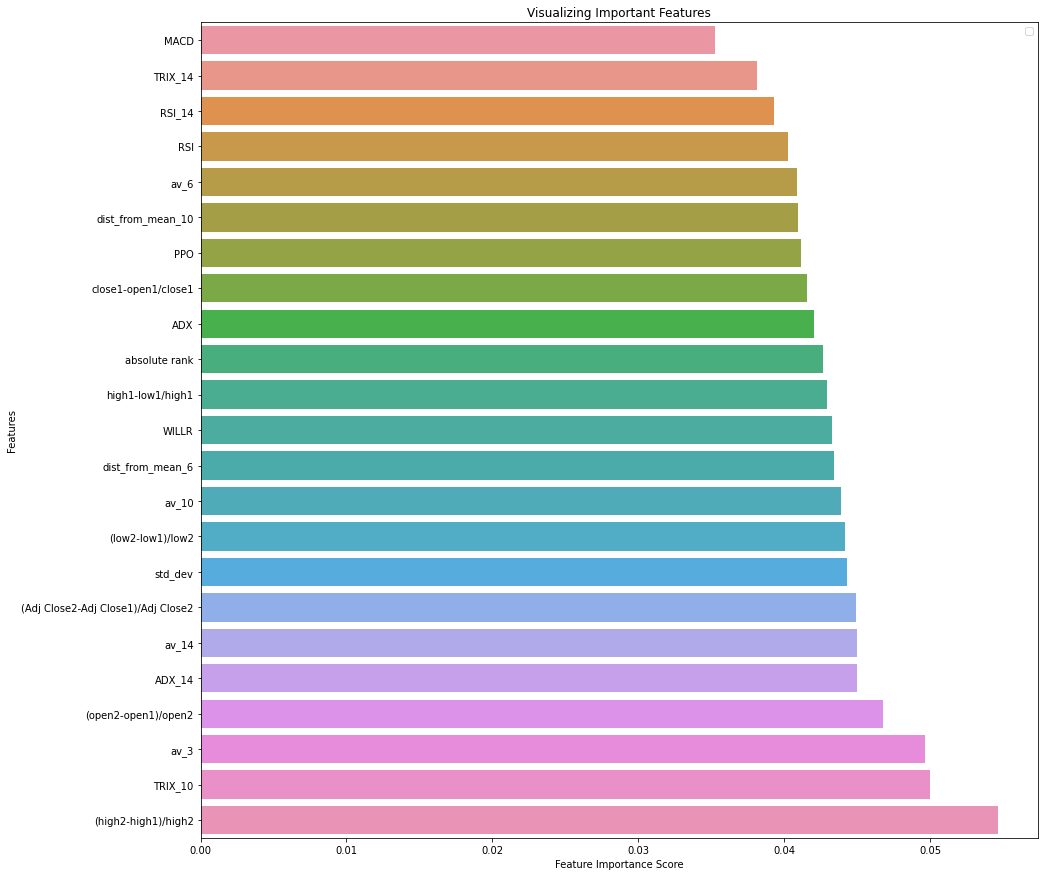

In [36]:
#---get feature importances ---#
#using the tuning from before--> best one from 5-folds
model6=RandomForestClassifier()
# model6=RandomForestClassifier(n_estimators=800,max_features="log2",bootstrap=True)
for j in assets:
    tmp1=[]
    df1=stock[j] #all the days we need so we can fix the columns 
    X= df1.iloc[:,5:29]
    # X=X.drop(['RSI','TRIX_10','RSI_14','dist_from_mean_6','(Adj Close2-Adj Close1)/Adj Close2','av_6','high1-low1/high1','CMO_14','close1-open1/close1','MACD','PPO','std_dev','TRIX_14','(open2-open1)/open2','av_14','WILLR','(high2-high1)/high2','ADX_14','absolute rank'],axis=1)
    # X=X.drop(['RSI_14','MACD','RSI','dist_from_mean_10','TRIX_10','av_6','close1-open1/close1','CMO_14','absolute rank','dist_from_mean_6','av_10','(open2-open1)/open2'],axis=1)
    # X=X.drop(['RSI_14','MACD','RSI','dist_from_mean_10','TRIX_10','av_6','close1-open1/close1'],axis=1)
    X = X.drop(['CMO_14'],axis=1)
    # print(X) #it has all the days
    y= df1['Rank']
    model6.fit(X,y)
# get importance
importance8 = model6.feature_importances_

# summarize feature importance
d8=dict()
for i,v in enumerate(importance8):
  # print('Feature: %0d, Score: %.5f' % (i,v))
  d8[X.columns[i]]= v
features=X.columns.values
# ax=plt.plot(features,importance1)
# plt.figure(figsize=(15,15))
# plt.barh(list(d8.keys()), list(d8.values()))
# plt.title("Random Forest Classifier")
plt.figure(figsize=(15,15))
df=pd.DataFrame({"Feature_Importance":list(d8.values()) , "Features": list(d8.keys())})
sns.barplot(x='Feature_Importance', y= "Features",data = df,order= df.sort_values('Feature_Importance').Features)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

#####Evaluation of the model in relation to feature importances 

In [43]:
stock1=stock.copy()
# print(stock1)
for j in assets:
  stock1[j]=stock1[j].drop(['RSI_14','MACD','RSI','dist_from_mean_10','TRIX_10','av_6'],axis=1)
# model7=RandomForestClassifier(n_estimators=800,max_features="log2",bootstrap=True)
model7=RandomForestClassifier()
prob7= predictions(model7,assets,stock1,23)
prob7['date']=stock['ABBV'].iloc[-60:].index
prob7_final=pd.DataFrame.from_dict(prob7)
prob7_final.set_index('date')
RPS7= RPS_data(prob7_final,rd)
RPS7= create_RPS(prob7_final,RPS7)
print(RPS7.mean(axis=1).mean())

                           (open2-open1)/open2  (high2-high1)/high2  \
Date                                                                  
2022-03-30 00:00:00-04:00            -0.014819            -0.007715   

                           (low2-low1)/low2  \
Date                                          
2022-03-30 00:00:00-04:00         -0.011032   

                           (Adj Close2-Adj Close1)/Adj Close2      av_3  \
Date                                                                      
2022-03-30 00:00:00-04:00                           -0.001297  0.003929   

                              av_10     av_14  high1-low1/high1  \
Date                                                              
2022-03-30 00:00:00-04:00  0.003958  0.006089          0.012188   

                           close1-open1/close1       ADX    ADX_14   TRIX_14  \
Date                                                                           
2022-03-30 00:00:00-04:00            -0.004995  0.594156

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  del sys.path[0]


KeyError: ignored

#####Tuning hyperparameterers after feature importances
***

3-fold

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'bootstrap': bootstrap}


In [ ]:
model8=RandomForestClassifier()
model8_random = RandomizedSearchCV(estimator = model8, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
for j in assets:
      df=stock1[j]
      df1=df.dropna()
      X= df1.iloc[:,:-1]
      # print(X)
      y= df1['Rank']
      X_train= X.iloc[:-60] #only the days of one year until 3/01
      Y_train= y.iloc[:-60]
      model8_random.fit(X_train,Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each

In [ ]:
model8_random.best_params_

{'bootstrap': True, 'max_features': 'log2', 'n_estimators': 50}

5-fold

In [ ]:
model9=RandomForestClassifier()
model9_random = RandomizedSearchCV(estimator = model9, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
for j in assets:
      df=stock1[j]
      df1=df.dropna()
      X= df1.iloc[:,:-1]
      # print(X)
      y= df1['Rank']
      X_train= X.iloc[:-60] #only the days of one year until 3/01
      Y_train= y.iloc[:-60]
      model9_random.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates

In [ ]:
model9_random.best_params_

{'bootstrap': True, 'max_features': 'log2', 'n_estimators': 800}

#####Final Random Forest after feature importances and tunings
***

from 3-folds

In [ ]:
stock2=stock.copy()
# print(stock2)
for j in assets:
  stock2[j]=stock2[j].drop(['RSI_14','MACD','RSI','dist_from_mean_10','TRIX_10'],axis=1)

In [ ]:

model10=RandomForestClassifier(n_estimators=50,max_features="log2",bootstrap=True)
print(stock2)
prob10= predictions(model10,assets,stock2,24)
prob10['date']=stock2['ABBV'].iloc[-60:].index
prob10_final=pd.DataFrame.from_dict(prob10)
prob10_final.set_index('date')
RPS10= RPS_data(prob10_final,rd)
RPS10= create_RPS(prob10_final,RPS10)
print(RPS10.mean(axis=1).mean())

{'ABBV':                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-03-04  106.500000  107.750000  104.949997  105.650002   99.167702   
2021-03-05  106.010002  106.989998  104.070000  106.699997  100.153282   
2021-03-08  106.849998  108.160004  105.800003  106.110001   99.599487   
2021-03-09  106.480003  108.690002  106.440002  106.790001  100.237762   
2021-03-10  107.389999  108.360001  107.050003  108.000000  101.373520   
...                ...         ...         ...         ...         ...   
2022-03-24  159.220001  160.729996  158.850006  160.279999  157.456436   
2022-03-25  160.550003  161.979996  160.229996  161.330002  158.487930   
2022-03-28  160.610001  162.029999  159.529999  161.970001  159.116653   
2022-03-29  162.990005  163.279999  161.289993  162.179993  159.322952   
2022-03-30  161.720001  164.350006  161.720001  163.750000  160.865295   

            (open2-open1)/op

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


0.16747040000000005


from 5-folds

In [ ]:
model11=RandomForestClassifier(n_estimators=800,max_features="log2",bootstrap=True)
prob11= predictions(model11,assets,stock2,24)
prob11['date']=stock2['ABBV'].iloc[-60:].index
prob11_final=pd.DataFrame.from_dict(prob11)
prob11_final.set_index('date')
RPS11= RPS_data(prob11_final,rd)
RPS11= create_RPS(prob11_final,RPS11)
print(RPS11.mean(axis=1).mean())

            (open2-open1)/open2  (high2-high1)/high2  (low2-low1)/low2  \
Date                                                                     
2022-03-30            -0.014819            -0.007715         -0.011032   

            (Adj Close2-Adj Close1)/Adj Close2      av_3      av_6     av_10  \
Date                                                                           
2022-03-30                           -0.001297  0.003929  0.002214  0.003958   

               av_14  high1-low1/high1  close1-open1/close1       ADX  \
Date                                                                    
2022-03-30  0.006089          0.012188            -0.004995  0.594156   

              ADX_14   TRIX_14     WILLR   std_dev  dist_from_mean_6  \
Date                                                                   
2022-03-30  0.363532  0.423065 -0.070604  1.818559          1.455564   

                 PPO     CMO_14  absolute rank  
Date                                            
2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


0.16535391249999998


In [ ]:
#save the best results
RPS11.to_excel('Method_6-Random_Forest.xlsx')

#####Comparison using the  same features with logistic regression
***

In [ ]:
stock3=stock.copy()
for j in assets:
    df=stock3[j]
    df=df[['Close','Open','High','Low','Adj Close','(high2-high1)/high2','(low2-low1)/low2','av_3','av_10','av_14','ADX','ADX_14','WILLR','absolute rank','Rank']]
    stock3[j]=df


In [ ]:
model12=RandomForestClassifier(n_estimators=800,max_features="log2",bootstrap=True)
prob12= predictions(model12,assets,stock3,14)
prob12['date']=stock3['ABBV'].iloc[-60:].index
prob12_final=pd.DataFrame.from_dict(prob12)
prob12_final.set_index('date')
RPS12= RPS_data(prob12_final,rd)
RPS12= create_RPS(prob12_final,RPS12)
print(RPS12.mean(axis=1).mean())

            (high2-high1)/high2  (low2-low1)/low2      av_3     av_10  \
Date                                                                    
2022-03-30            -0.007715         -0.011032  0.003929  0.003958   

               av_14       ADX    ADX_14     WILLR  absolute rank  
Date                                                               
2022-03-30  0.006089  0.594156  0.363532 -0.070604           41.0  
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.07    0.205   0.23125 0.24    0.25375]
            (high2-high1)/high2  (low2-low1)/low2      av_3     av_10  \
Date                                                                    
2022-03-30             -0.01219         -0.014379  0.007735  0.002696   

              av_14       ADX    ADX_14     WILLR  absolute rank  
Date                                                              
2022-03-30  0.00275  0.282774  0.255444 -0.022139           38.0  
DatetimeIndex(['2022-03-30'], dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


0.16744199456018521
